<h1>Mục lục<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#foreach" data-toc-modified-id="foreach-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>foreach</a></span><ul class="toc-item"><li><span><a href="#Cách-sử-dụng-thứ-nhất" data-toc-modified-id="Cách-sử-dụng-thứ-nhất-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cách sử dụng thứ nhất</a></span></li><li><span><a href="#Cách-sử-dụng-thứ-2" data-toc-modified-id="Cách-sử-dụng-thứ-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Cách sử dụng thứ 2</a></span></li></ul></li><li><span><a href="#Tóm-tắt" data-toc-modified-id="Tóm-tắt-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tóm tắt</a></span></li></ul></div>

Stata cung cấp nhiều phương án khác nhau để thực hiện các vòng lặp - các thao tác tuần tự giống nhau ở tất cả các biến số quan tâm. Trong đó bao gồm:
- foreach
- forvalues
- while

Bài viết này sẽ giới thiệu về foreach.
Biết về cách hoạt động của vòng lặp không chỉ giúp tiết kiệm công sức và thời gian xử lý số liệu, nó còn giúp người đọc đọc hiểu được cú pháp của các chuyên gia Stata.

## foreach

### Cách sử dụng thứ nhất

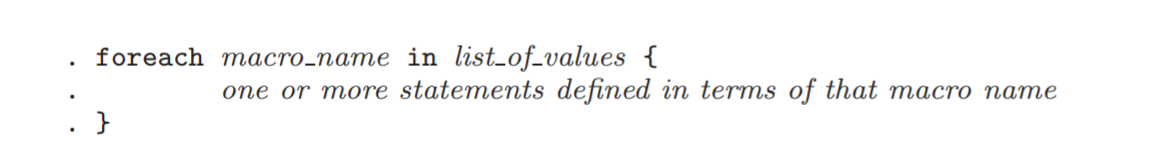

**Ví dụ 1**: Tôi có 1 bộ số liệu với nhiều biến số thời gian ở dạng kí tự,  tôi muốn chuyển tất cả biến số này sang dạng chuẩn mà Stata có thể thực hiện được bằng cách dưới đây sử dụng foreach

In [2]:
foreach bienso in time11 time21 time31 time51 {
    gen `bienso'_dung = date(`bienso', "DMY")
}
format *_dung %tdDD/NN/CCYY
list *_dung





     +---------------------------------------------------+
     | time11_d~g   time21_d~g   time31_d~g   time51_d~g |
     |---------------------------------------------------|
  1. | 08/10/2019   08/10/2019   08/10/2019   08/10/2019 |
  2. | 08/10/2019   08/10/2019   08/10/2019   08/10/2019 |
  3. | 08/10/2019   08/10/2019   08/10/2019   09/10/2019 |
  4. | 08/10/2019   08/10/2019   08/10/2019   09/10/2019 |
  5. | 08/10/2019   08/10/2019   08/10/2019   08/10/2019 |
     +---------------------------------------------------+



Để xây dựng được 1 vòng lặp hoàn chỉnh ta cần 2 yếu tố:
- *macro_name*, trong trường hợp này là `bienso`
- Một danh sách các giá trị cần đi qua tuần tự

Ở trong ví dụ trên, ta có `bienso`: sẽ lần lượt nhật các giá trị từ **time11 time21 time31 time51**.
Tuy nhiên, Stata không nhận biết được `bienso`, chỉ khi được viết dưới dạng \``bienso`\` thì Stata mới xác nhận được giá trị bên trong. Sau khi kết thúc vòng lặp, *macro_name* `bienso` cũng sẽ biến mất. Sau `in` sẽ là 1 danh sách bất kì các giá trị cần đi qua tuần tự ngẫu nhiên không có đặc điểm chung cho các biến trên.
Các câu lệnh tuần tự được thực hiện ở phần giữa của 2 dấu ngoặc `{}`.

### Cách sử dụng thứ 2

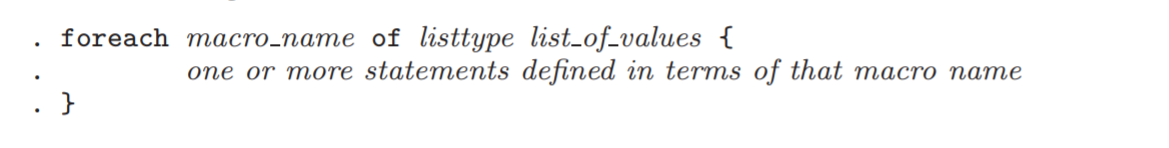

In [3]:
drop *_dung
foreach bienso of varlist time11-time51 {
    gen `bienso'_dung = date(`bienso', "DMY")
    format `bienso'_dung %tdDD/MM/CCYY
}
list *_dung





     +---------------------------------------------------+
     | time11_d~g   time21_d~g   time31_d~g   time51_d~g |
     |---------------------------------------------------|
  1. | 08/00/2019   08/00/2019   08/00/2019   08/00/2019 |
  2. | 08/00/2019   08/00/2019   08/00/2019   08/00/2019 |
  3. | 08/00/2019   08/00/2019   08/00/2019   09/00/2019 |
  4. | 08/00/2019   08/00/2019   08/00/2019   09/00/2019 |
  5. | 08/00/2019   08/00/2019   08/00/2019   08/00/2019 |
     +---------------------------------------------------+


- Điểm khác biệt trong cách này là ở `listtype` và được sử dụng với `of` thay vì `in` như cấu trúc 1
- `listtype` trong ví dụ bên trên là *varlist - 1 danh sách các biến số từ biến time11 cho đến biến time51*. Ngoài varlist listtype còn có local, global, numlist cũng sử dụng tương tự varlist sau `of`.
- Các `listype` sẽ giúp giản lược danh sách các giá trị và tăng tốc độ xử lý số liệu

**Ví dụ 2**: Tạo và tính toán biến mới

Nguồn tham khảo: https://stats.idre.ucla.edu/stata/modules/working-across-variables-using-foreach/

In [4]:
set linesize 150
clear
qui {
    input famid inc1-inc12
    1 3281 3413 3114 2500 2700 3500 3114 3319 3514 1282 2434 2818
    2 4042 3084 3108 3150 3800 3100 1531 2914 3819 4124 4274 4471
    3 6015 6123 6113 6100 6100 6200 6186 6132 3123 4231 6039 6215
    end
} 

Dưới đây là thu nhập cho 12 tháng, nhưng tôi mong muốn tính thu nhập theo quý sử dụng foreach

In [5]:
foreach qtr of numlist 1/4 {
    * tháng cuối quý
    local m3 = `qtr'*3
    * tháng giữa quý
    local m2 = (`qtr'*3)-1
    * tháng đầu quý
    local m1 = (`qtr'*3)-2
    generate incqtr`qtr' = inc`m1' + inc`m2' + inc`m3'
}
list incqtr1 - incqtr4




     +---------------------------------------+
     | incqtr1   incqtr2   incqtr3   incqtr4 |
     |---------------------------------------|
  1. |    9808      8700      9947      6534 |
  2. |   10234     10050      8264     12869 |
  3. |   18251     18400     15441     16485 |
     +---------------------------------------+


## Tóm tắt

Vòng lặp là 1 cách làm hữu dụng để tăng hiệu quả làm việc với Stata lên nhiều lần. Một vấn đề mà bạn phải cân nhắc đó là cần cân nhắc sử dụng vòng lặp đối với dữ liệu lớn, trong trường hợp này sử dụng vòng lặp có thể cho tác dụng ngược lại. Trong trường hợp với dữ liệu lớn, Stata cung cấp 1 phương pháp khác tăng tốc độ tính toán hơn sẽ được trình bày trong các bài lần sau.

Chúc các bạn thực hành vui